# Optimizing Solar Panel Efficiency:  Computer Vision Approach to Dust Detection on Solar Panel



**AUTHOR**       **:** Muhammad Aqhari Nasrin Bin Ramli

**E-mail**       **:** muhammad.aqhari.nasrin@gmail.com

**LinkedIn**     **:** [Muhammad Aqhari Nasrin Bin Ramli](https://www.linkedin.com/in/muhammad-aqhari-nasrin-bin-ramli/)

**DATA SOURCE**  **:** [SolNet: A Convolutional Neural Network for Detecting Dust on Solar Panels](https://drive.google.com/drive/folders/12Q3MBI8SPw0vHsO_kkS5izkxw0F7tXx4)

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.2.0
aggdraw                       1.3.18
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
back

parso                         0.8.3
partd                         1.2.0
pathspec                      0.7.0
patsy                         0.5.2
pep8                          1.7.1
pexpect                       4.8.0
pickleshare                   0.7.5
Pillow                        9.0.1
pip                           21.2.4
pkginfo                       1.8.2
plotly                        5.6.0
pluggy                        1.0.0
poyo                          0.5.0
pprintpp                      0.4.0
prettytable                   3.9.0
prometheus-client             0.13.1
promise                       2.3
prompt-toolkit                3.0.20
prophet                       1.1.5
Protego                       0.1.16
protobuf                      3.19.6
psutil                        5.8.0
ptyprocess                    0.7.0
pure-eval                     0.2.2
py                            1.11.0
pyasn1                        0.4.8
pyasn1-modules                0.2.8
pycodestyle             

In [3]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix



from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC


In [4]:
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
    #tf.config.experimental.set_memory_growth(gpu, True)

# Loading Data

In [5]:
data = r'C:\Users\muham\OneDrive\Desktop\Solar Panel Computer Vision\dataset\dataset'  


In [6]:
data = tf.keras.utils.image_dataset_from_directory(data)

Found 842 files belonging to 2 classes.


In [7]:
# Display class names
class_names = data.class_names
print("Class names:", class_names)


Class names: ['clean', 'dirty']


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

# Data Visualization

In [10]:
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0])

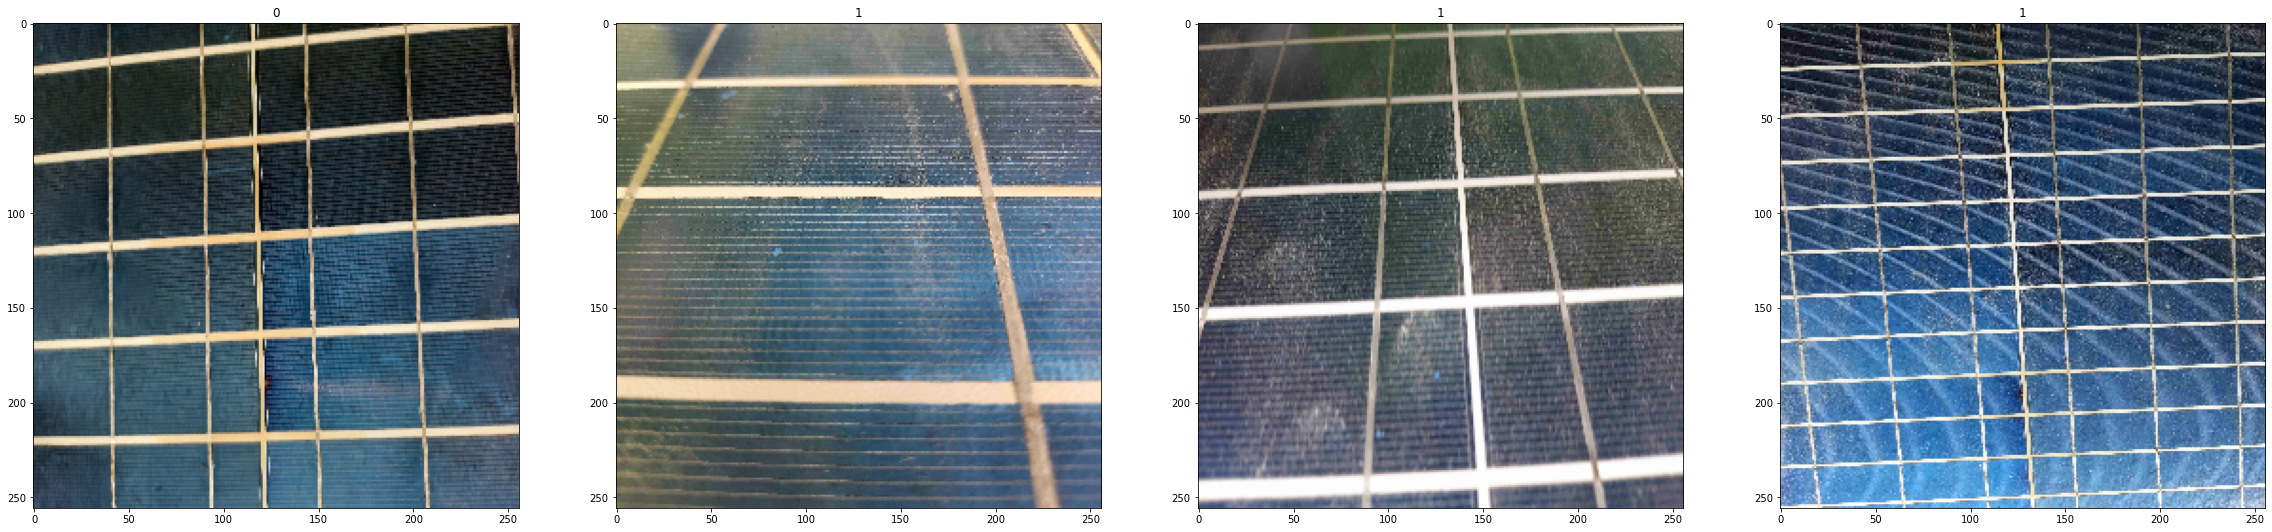

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(40,40))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [12]:
batch[0].shape

(32, 256, 256, 3)

# Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.34301472, 0.47242647, 0.5939951 ],
          [0.43054533, 0.5599571 , 0.6815257 ],
          [0.22193532, 0.42977846, 0.5866412 ],
          ...,
          [0.13333334, 0.28235295, 0.37254903],
          [0.18039216, 0.31764707, 0.39215687],
          [0.23509784, 0.3409802 , 0.38411745]],
 
         [[0.3427696 , 0.4447304 , 0.5464461 ],
          [0.39715073, 0.5030331 , 0.60891545],
          [0.28878677, 0.4966299 , 0.6534926 ],
          ...,
          [0.14117648, 0.2901961 , 0.38039216],
          [0.16862746, 0.30588236, 0.38039216],
          [0.21176471, 0.31764707, 0.36078432]],
 
         [[0.27941176, 0.3852941 , 0.49117646],
          [0.337163  , 0.44304535, 0.5489277 ],
          [0.24859548, 0.4564386 , 0.61330134],
          ...,
          [0.13477328, 0.28379288, 0.37398896],
          [0.18198529, 0.31924018, 0.39375   ],
          [0.2508588 , 0.35073626, 0.42365292]],
 
         ...,
 
         [[0.2       , 0.46666667, 0.6039216 ],
          [0.16078

# Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
val

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Build The Model

In [20]:
input_shape = (256, 256, 3)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=3, strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                        

# Model Training

In [22]:

learning_rate = 0.1

custom_adam_optimizer = Adam(learning_rate=learning_rate)

metrics = [
    TruePositives(name='tp'),
    FalsePositives(name='fp'),
    TrueNegatives(name='tn'),
    FalseNegatives(name='fn'),
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='AUC')
]

model.compile(optimizer=custom_adam_optimizer, loss=BinaryCrossentropy(), metrics=metrics)


In [23]:
history = model.fit(train, validation_data=val, epochs=20, verbose=1)


Epoch 1/20
18/18 [==============================] - 122s 6s/step - loss: 22.2956 - tp: 113.0000 - fp: 125.0000 - tn: 230.0000 - fn: 108.0000 - accuracy: 0.5955 - precision: 0.4748 - recall: 0.5113 - AUC: 0.5956 - val_loss: 1503744.7500 - val_tp: 68.0000 - val_fp: 92.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4250 - val_precision: 0.4250 - val_recall: 1.0000 - val_AUC: 0.5000
Epoch 2/20
18/18 [==============================] - 127s 7s/step - loss: 7.7666 - tp: 128.0000 - fp: 75.0000 - tn: 279.0000 - fn: 94.0000 - accuracy: 0.7066 - precision: 0.6305 - recall: 0.5766 - AUC: 0.7020 - val_loss: 7240.1094 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 102.0000 - val_fn: 58.0000 - val_accuracy: 0.6375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.5000
Epoch 3/20
18/18 [==============================] - 132s 7s/step - loss: 2.2199 - tp: 182.0000 - fp: 59.0000 - tn: 283.0000 - fn: 52.0000 - accuracy: 0.8073 - precision: 0.7552 - recall: 0.7778 - A

# Plot The Performance

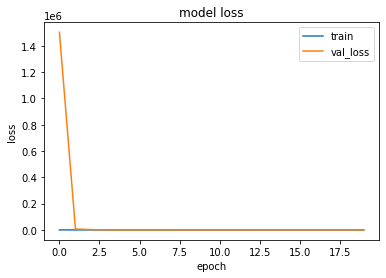

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','val_loss'])
plt.show()

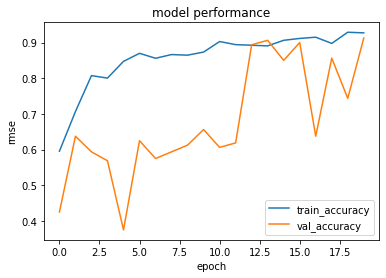

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model performance")
plt.ylabel("rmse")
plt.xlabel("epoch")
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

# Evaluate the Model

In [26]:
labels = []
inp = []

for x,y in test.as_numpy_iterator():
  labels.append(y)
  inp.append(x)

print(np.array(inp).shape)

labels = np.array([i[0] for i in labels])

print(labels)

(2, 32, 256, 256, 3)
[0 1]


In [27]:
predicted = model.predict(np.array(inp)[:,0,...])
print(predicted.shape)

1/1 [==============================] - 1s 732ms/step
(2, 1)


[[25 19]
 [27 29]]


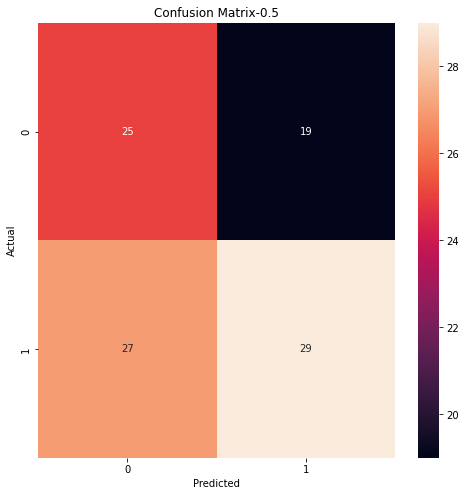

In [28]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



threshold = 0.5

# Generate sample data for demonstration
np.random.seed(42)
labels = np.random.randint(0, 2, size=(100,))
predicted = np.random.rand(100)

cm = confusion_matrix(labels, predicted > threshold)

print(cm)

plt.figure(figsize=(8, 8))

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix-{}'.format(threshold))
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


[[25 19]
 [27 29]]


Text(0.5, 51.0, 'Predicted')

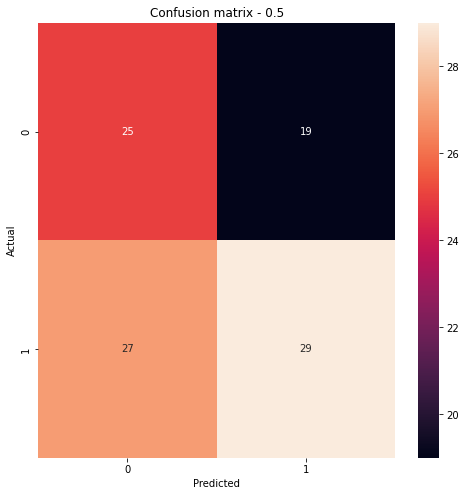

In [29]:
threshold = 0.5

cm = confusion_matrix(labels, predicted > threshold)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix - {}'.format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')


# Test The Model

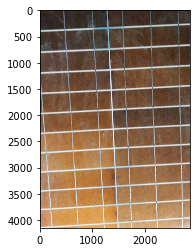

In [30]:
img = cv2.imread(r"C:\Users\muham\OneDrive\Desktop\Solar Panel Computer Vision\dataset\dataset\dirty\20210917_105938_76_11zon.jpg")
plt.imshow(img)
plt.show()

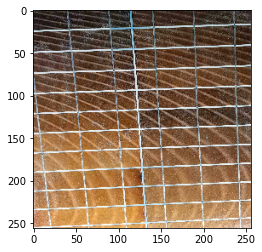

In [31]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 140ms/step


In [33]:
if yhat > 0.5: 
    print(f'Predicted class is dirty')
else:
    print(f'Predicted class is clean')

Predicted class is dirty


# Save The Model

In [34]:
from tensorflow.keras.models import load_model

In [35]:
model.save(os.path.join(r'C:\Users\muham\OneDrive\Desktop\Solar Panel Computer Vision\dataset\Model', 'solarpanelimageclassifier2.h5'))


In [36]:
#new_model = load_model(r"C:\Users\muham\OneDrive\Desktop\Solar Panel Computer Vision\dataset\Model\solarpanelimageclassifier.h5")

In [37]:
#new_model.predict(np.expand_dims(resize/255, 0))